<a href="https://colab.research.google.com/github/dasnikita/Chatbot-Using-LSTM/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PythonGeeks
#importing the libraries
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
%%writefile converations.json
{
    "intents":
 [
  {
      "intent":"greeting",
      "text":[" ","Greetings","Hi","hi","hey","hello","hi there","greetings","hey there","anyone here?","is this ticketbot?"],
      "responses":[
                 "Hello",
                 "How can I help you?",
                 "Hi there",
                 "Greetings.. How can i help you?",
                 "Can i help you with anything?",
                 "Hi, do you need any help?",
                 "Hi",
                 "What's up?"
      ]
  },
  {
     "intent":"goodbye",
      "text":["alright","k","got it","thanks","bye","thank you","that is all","no queries left","thank you for your help","okay bye","goodbye","thank you so much", "all issues resolved","thank you for the help"],
      "responses":[
                 "Have a great day!",
                 "Goodbye",
                 "Okay bye",
                 "Bye",
                 "Glad I could help. Goodbye"]
  },
  {
     "intent":"booking",
      "text":["Book a ticket","ticket please","i would like to book a ticket","book a ticket","ticket booking","buy a ticket","book tickets","booking", "book","bookings","ticket book","ticket","buy"],
      "responses":[
                 "Sure, choose dates and destinations in the above feilds and check for availability",
                 "You are required to fill the details and check for availability and then book tickets"
                 ]
  },  
  {
      "intent":"cancellation",
      "text":["i would like to cancel a ticket","cancel a ticket","ticket cancellation","cancel tickets","cancel","cancellation"],
      "responses":[
                 "Sure, add PNR in cancellation section and cancel your tickets, charges will be applied ",
                 "Go to the cancellation tab above to proceed with cancellation, charges will be applied"
                 ]
  }

               
    ]
 }

Overwriting converations.json


In [ ]:
#import dataset
with open('converations.json') as conv:
  data =  json.load(conv)

In [ ]:
tags = []
queries = []
replies = {}

for intent in data['intents']:
  replies[intent['intent']] = intent['responses'] 
  for statements in intent['text']:
    queries.append(statements)
    tags.append(intent['intent'])


In [ ]:
df = pd.DataFrame({'text' : queries , 'intent' : tags})
df

,text,intent
0,,greeting
1,Greetings,greeting
2,Hi,greeting
3,hi,greeting
4,hey,greeting
5,hello,greeting
6,hi there,greeting
7,greetings,greeting
8,hey there,greeting
9,anyone here?,greeting


In [ ]:
#remove punctuations
import string
df['text']= df['text'].apply (lambda word: [character.lower() for character in word if character not in string.punctuation])
df['text']= df['text'].apply(lambda word: ''.join(word))
df.to_csv("/content/conversations.csv")

In [ ]:
data = pd.read_csv("/content/conversations.csv")
data

,Unnamed: 0,text,intent
0,0,,greeting
1,1,greetings,greeting
2,2,hi,greeting
3,3,hi,greeting
4,4,hey,greeting
5,5,hello,greeting
6,6,hi there,greeting
7,7,greetings,greeting
8,8,hey there,greeting
9,9,anyone here,greeting


In [ ]:
#tokenize the data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])


In [ ]:
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X)
#encoding the outputs
le = LabelEncoder()
y = le.fit_transform(data['intent'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)



In [ ]:
y_train.shape

(35,)

In [ ]:
inputshape =  X_train.shape[1]
inputshape

7

In [ ]:
vocab = len(tokenizer.word_index)
print("number of unique words : ", vocab)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  47
output length:  4


In [ ]:
inputlayer = Input(shape=(inputshape,))
x1 = Embedding (vocab +1 , 10) (inputlayer)
x2 = LSTM (10, return_sequences=True) (x1)
x3 = Flatten()(x2)
x4 = Dense(256, activation="relu")(x3)
x5 = Dense(64, activation="relu")(x4)
x6 = Dense(32, activation="relu")(x5)
x7 = Dense(output_length, activation="softmax")(x6)
model = Model (inputlayer, x7)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train,y_train, epochs = 200)

Epoch 1/200
2/2 [==============================] - 2s 10ms/step - loss: 1.3861 - accuracy: 0.2286
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3829 - accuracy: 0.2571
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3813 - accuracy: 0.2571
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3805 - accuracy: 0.2571
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3785 - accuracy: 0.2571
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 1.3755 - accuracy: 0.2571
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 1.3717 - accuracy: 0.2571
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3674 - accuracy: 0.2571
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3625 - accuracy: 0.3143
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 1.3571 - accuracy: 0.5143
Epoch 11/200
2/2 [==========

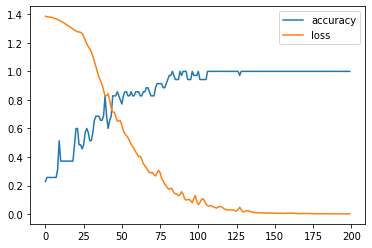

In [ ]:
plt.plot(hist.history['accuracy'], label ="accuracy")
plt.plot(hist.history['loss'], label='loss')
plt.legend()

In [ ]:
#Test your chatbot
import random
while True:
  texts_p = []
  prediction_input = input('You : ')
  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ' '.join(prediction_input)
  texts_p.append(prediction_input)
  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], inputshape)
  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  #finding the right tag and predicting
  replies_tag = le.inverse_transform([output])[0]
  print("TicketBot : " , random.choice(replies[replies_tag]))
  if replies_tag == 'goodbye':
    break

You : bye
TicketBot :  What's up?
You : bye
TicketBot :  How can I help you?


KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pickle
pickle.dump(model,open('/content/drive/MyDrive/chatbot.pkl','wb'))
pickle.dump(le,open('/content/drive/MyDrive/chatbot_labelencoder.pkl','wb'))
pickle.dump(tokenizer,open('/content/drive/MyDrive/chatbot_tokenizer.pkl','wb'))

INFO:tensorflow:Assets written to: ram://5578284a-78e1-4702-baf8-0f54dd318419/assets


INFO:tensorflow:Assets written to: ram://5578284a-78e1-4702-baf8-0f54dd318419/assets


In [ ]:
y_pred = model.predict(X_test) 

In [ ]:
y_pred[8].argmax()

3

In [ ]:
y_test[8].argmax()

0